#### Задача 1

In [1]:
import paramiko, re

In [2]:
clnt=paramiko.SSHClient()
hostname='192.168.56.101'
username='tatyana'
pkey=paramiko.RSAKey.from_private_key_file('C:/Users/orange/.ssh/id_rsa')
policy = paramiko.AutoAddPolicy
clnt.set_missing_host_key_policy(policy)
clnt.connect(hostname=hostname, username=username, pkey=pkey)
stdin, stdout, stderr = clnt.exec_command('cat /etc/services')
data = stdout.read() + stderr.read()
clnt.close()

In [3]:
data_decode = data.decode('utf8')
out_data = re.findall(r'5.../udp', data_decode)

In [4]:
out_data

['5060/udp',
 '5061/udp',
 '5353/udp',
 '5672/udp',
 '5354/udp',
 '5355/udp',
 '5555/udp',
 '5345/udp']

#### Задача 2

In [5]:
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('C:/Users/orange/Downloads/SalesJan2009.csv')

In [7]:
df.head()

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,...,Account_Created.day-of-month,Account_Created.day-of-week,Account_Created.hour,Account_Created.minute,Last_Login.year,Last_Login.month,Last_Login.day-of-month,Last_Login.day-of-week,Last_Login.hour,Last_Login.minute
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,...,2,5,6,0,9,1,2,5,6,8
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,...,2,5,4,42,9,1,2,5,7,49
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,...,1,4,16,21,9,1,3,6,12,32
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,...,25,7,21,13,9,1,3,6,14,22
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,...,15,6,15,47,9,1,4,7,12,45


In [8]:
df.columns

Index(['Transaction_date', 'Product', 'Price', 'Payment_Type', 'Name', 'City',
       'State', 'Country', 'Account_Created', 'Last_Login', 'Latitude',
       'Longitude', 'Transaction_date.year', 'Transaction_date.month',
       'Transaction_date.day-of-month', 'Transaction_date.day-of-week',
       'Transaction_date.hour', 'Transaction_date.minute',
       'Account_Created.year', 'Account_Created.month',
       'Account_Created.day-of-month', 'Account_Created.day-of-week',
       'Account_Created.hour', 'Account_Created.minute', 'Last_Login.year',
       'Last_Login.month', 'Last_Login.day-of-month', 'Last_Login.day-of-week',
       'Last_Login.hour', 'Last_Login.minute'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction_date               998 non-null    object 
 1   Product                        998 non-null    object 
 2   Price                          998 non-null    int64  
 3   Payment_Type                   998 non-null    object 
 4   Name                           998 non-null    object 
 5   City                           998 non-null    object 
 6   State                          989 non-null    object 
 7   Country                        998 non-null    object 
 8   Account_Created                998 non-null    object 
 9   Last_Login                     998 non-null    object 
 10  Latitude                       998 non-null    float64
 11  Longitude                      998 non-null    float64
 12  Transaction_date.year          998 non-null    int

Общая информация по DF, названия колонок, типы данных

In [10]:
avg_mastercard = df.query('Payment_Type == "Mastercard"')['Price'].mean()

In [11]:
avg_mastercard

1655.0541516245487

In [12]:
df['date'] = pd.to_datetime(df['Transaction_date'], format='%m/%d/%y %H:%M').dt.round('d').astype('str')

In [13]:
payment_systems = df['Payment_Type'].drop_duplicates()

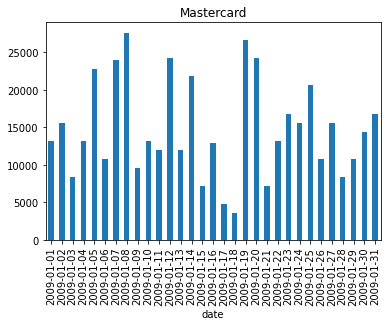

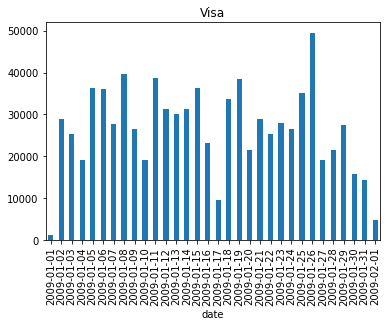

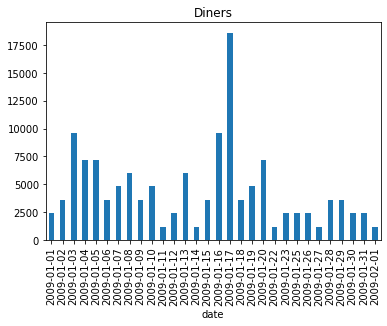

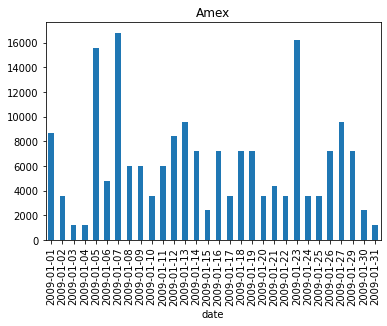

In [15]:
for _ in payment_systems:
    df.query('Payment_Type == @_').groupby('date')['Price'].agg('sum').plot(kind='bar', title=_)
    plt.show()